# Machine Learning Midterm Solution, Aug Semester, 2019

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.

Note that you have **2.5 hours** to do the exam. Also note that there is at least one short answer question that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (20 points)

Suppose you enjoy running for exercise, have great data science skills, and would like to build tools to help runners train effectively. You would like to predict a runner's future performance based on his or her past performances, and perhaps come up with some analytics about his or her fitness (increasing, decreasing, etc.)

Consider the training and testing data given in the cell below. The data are measurements of Matt's runs from mid June to mid September 2019. The $\mathtt{X}$ data contain variables for pace, distance, average temperature, and the number of hours of rest since the last run. The $\mathbf{y}$ data are the average heart rate in beats per minute over each run. These data come from Garmin and OpenWeatherMap.


In [66]:
import numpy as np

# Columns:
# 0: average pace in minutes per kilometer
# 1: distance in meters
# 2: avg apparent temperature (Farenheight, includes humidity factor etc.)
# 3: number of hours of rest since the last run

Xtrain = np.array(
      [[5.6041250e+00, 1.0386240e+04, 9.6480003e+01, 1.6693195e+02],
       [4.5901036e+00, 3.3501699e+03, 9.0070000e+01, 1.4042222e+01],
       [5.5853438e+00, 1.0589420e+04, 9.6894997e+01, 4.9480556e+01],
       [8.4602365e+00, 5.2353198e+03, 9.2915001e+01, 4.8527222e+01],
       [5.2759314e+00, 1.0260830e+04, 8.0415001e+01, 6.9376945e+01],
       [5.0050054e+00, 1.0308060e+04, 7.8995003e+01, 7.2154442e+01],
       [5.1679587e+00, 1.0297140e+04, 8.4269997e+01, 2.4243610e+01],
       [5.5909653e+00, 1.6628650e+04, 9.5754997e+01, 5.8910278e+01],
       [5.3112388e+00, 1.0397030e+04, 9.1875000e+01, 1.2679722e+01],
       [5.0704794e+00, 1.0266610e+04, 8.7489998e+01, 4.8466110e+01],
       [5.1297836e+00, 8.6998496e+03, 8.6510002e+01, 4.7598888e+01],
       [5.8092251e+00, 2.1145150e+04, 9.6199997e+01, 5.9379166e+01],
       [5.1203279e+00, 1.0201160e+04, 9.2875000e+01, 8.4886391e+01],
       [5.1424460e+00, 1.0161310e+04, 8.9500000e+01, 2.3730000e+01],
       [5.9502554e+00, 2.4152381e+04, 8.7389999e+01, 5.9973331e+01],
       [5.4752522e+00, 1.2884080e+04, 9.2269997e+01, 3.6443890e+01],
       [6.2727389e+00, 6.8037402e+03, 9.0209999e+01, 2.3653889e+01],
       [5.6941118e+00, 1.6106010e+04, 8.7489998e+01, 2.4058611e+01],
       [5.6941118e+00, 8.0607300e+03, 9.0735001e+01, 5.0604721e+01],
       [5.1313629e+00, 1.4493960e+04, 9.4910004e+01, 2.3852777e+01],
       [5.8397570e+00, 6.4594302e+03, 9.5209999e+01, 1.5108278e+02],
       [6.0342746e+00, 2.1100061e+04, 9.2345001e+01, 1.9518888e+01],
       [5.7790108e+00, 1.4495710e+04, 8.3410004e+01, 6.7106941e+01],
       [5.4059896e+00, 1.6109050e+04, 8.6989998e+01, 2.4075834e+01],
       [8.1819668e+00, 6.5416201e+03, 8.1650002e+01, 2.3606112e+01],
       [5.6230321e+00, 8.0613101e+03, 9.4324997e+01, 2.5450277e+01],
       [5.9101658e+00, 2.4156170e+04, 9.1650002e+01, 3.4091110e+01],
       [5.1313629e+00, 1.4496380e+04, 8.9084999e+01, 3.6194443e+01],
       [5.6650805e+00, 8.0576001e+03, 8.5985001e+01, 2.3728056e+01],
       [5.7991180e+00, 1.6350690e+04, 8.9775002e+01, 4.7979168e+01],
       [5.8234339e+00, 8.0631299e+03, 9.4845001e+01, 2.6273333e+01],
       [5.7254095e+00, 2.5760990e+04, 9.6279999e+01, 3.4454166e+01],
       [5.4324207e+00, 1.2948430e+04, 9.0654999e+01, 3.6110554e+01],
       [5.7097182e+00, 8.0617100e+03, 8.5294998e+01, 2.3565277e+01],
       [5.6727929e+00, 1.2387530e+04, 9.2535004e+01, 2.4852501e+01],
       [5.4024849e+00, 8.1778799e+03, 8.8980003e+01, 4.7656387e+01],
       [5.5242515e+00, 1.9322131e+04, 7.9985001e+01, 4.6826668e+01],
       [5.1234756e+00, 1.6099910e+04, 8.3794998e+01, 2.4853611e+01],
       [5.8418040e+00, 6.7139800e+03, 8.3955002e+01, 2.4078611e+01],
       [5.5151114e+00, 1.7712240e+04, 8.5815002e+01, 2.3572500e+01]])

# Outcome: average heart rate, in beats per minute

ytrain = np.array([[150., 146., 148., 152., 147., 152., 151., 144., 149., 146., 144.,
       141., 151., 150., 140., 147., 133., 144., 129., 154., 146., 141.,
       155., 151., 111., 138., 141., 151., 134., 150., 134., 150., 149.,
       134., 140., 137., 141., 150., 129., 143.]])

Xtest = np.array([[5.6516337e+00, 1.1277530e+04, 9.4644997e+01, 5.3126389e+01],
       [5.9737158e+00, 2.8977260e+04, 9.4230003e+01, 2.0872499e+01],
       [5.4094992e+00, 1.1285160e+04, 7.9794998e+01, 4.6364723e+01],
       [5.3885121e+00, 1.9334391e+04, 8.2080002e+01, 2.2815277e+01],
       [4.9500046e+00, 1.6110120e+04, 8.3410004e+01, 4.8843613e+01],
       [5.9269800e+00, 8.0592202e+03, 9.9250000e+01, 2.7060556e+01],
       [6.0496063e+00, 3.2190711e+04, 9.3800003e+01, 2.4073334e+01],
       [6.6427526e+00, 9.8029502e+03, 8.5150002e+01, 4.4903057e+01],
       [5.4112554e+00, 1.0247100e+04, 8.1955002e+01, 2.4426390e+01],
       [5.5853438e+00, 2.2543590e+04, 8.4849998e+01, 2.3573610e+01],
       [4.0709982e+00, 2.5134600e+03, 9.4324997e+01, 2.7191111e+01],
       [5.9038849e+00, 9.6685303e+03, 8.8099998e+01, 2.3758333e+01],
       [5.5315852e+00, 1.9787490e+04, 9.7684998e+01, 3.3159168e+01],
       [5.1062093e+00, 1.2883740e+04, 7.9375000e+01, 5.9931667e+01],
       [6.1591525e+00, 9.6694502e+03, 8.2260002e+01, 2.4936388e+01],
       [5.4914880e+00, 1.2887790e+04, 9.7154999e+01, 5.1264168e+01]])

ytest = np.array([[134., 144., 145., 142., 153., 130., 139., 122., 141., 140., 129.,
       129., 142., 143., 122., 141.]])


(Q1 continued) **Do the following:**

1. **Build a linear regresion model for the training data. Give the optimal parameter vector $\mathbf{\theta}$ below:**

In [67]:

m = Xtrain.shape[0]
X = np.concatenate((np.ones((m,1)), Xtrain), 1)
y = ytrain.T
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print(theta)


[[ 1.47941323e+02]
 [-5.41671644e+00]
 [ 3.19000792e-04]
 [ 2.18578976e-01]
 [ 6.18725326e-02]]


2. **Plot predicted heart rate against actual heart rate for the training set and the test set using these parameters.**

Text(140, 110, 'RMSE: 9.448')

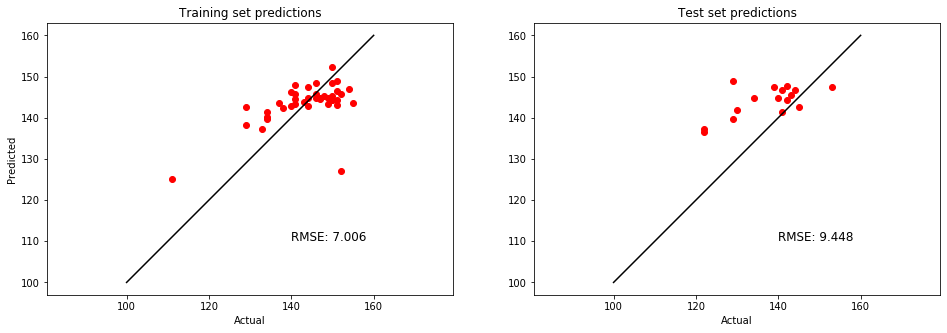

In [68]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [16, 5]

yhat = X @ theta

m2 = Xtest.shape[0]
X2 = np.concatenate((np.ones((m2,1)), Xtest), 1)
y2 = ytest.T
yhat2 = X2 @ theta

rmse = np.sqrt((yhat - y).T @ (yhat - y) / m)
rmse2 = np.sqrt((yhat2 - y2).T @ (yhat2 - y2) / m2)

fig, (ax1, ax2) = plt.subplots(1, 2)
miny = 100
maxy = 160

ax1.plot(y, yhat, 'ro')
ax1.plot([miny, maxy],[miny, maxy], 'k-')
ax1.set_xlim([miny, maxy])
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.axis('equal')
ax1.set_title('Training set predictions')
ax1.text(140, 110, 'RMSE: %.3f' % rmse, fontsize=12)

ax2.plot(y2, yhat2, 'ro')
ax2.plot([miny, maxy],[miny, maxy], 'k-')
ax2.set_xlim([miny, maxy])
ax2.set_xlabel('Actual')
ax2.axis('equal')
ax2.set_title('Test set predictions')
ax2.text(140, 110, 'RMSE: %.3f' % rmse2, fontsize=12)


## Question 2 (20 points)

As it turns out, there is one outlier in the training data, when Matt's heart rate monitor was not fixed correctly against the skin, resulting in a strange average heart rate.

**Do the following:**

1. **Plot pace (column 0) against heart rate ($\textbf{y}$) for the training data.**

Text(0, 0.5, 'Average heart rate')

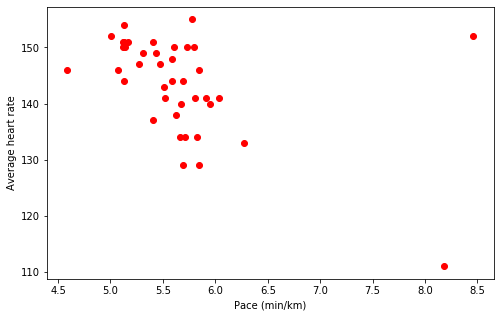

In [69]:

plt.figure(figsize=(8, 5))
plt.plot(Xtrain[:,0], ytrain.T, 'ro')
plt.xlabel('Pace (min/km)')
plt.ylabel('Average heart rate')


2. **Give the outlier point's data here and explain why it does not seem to be consistent with the other data.**

The outlier point is the one in the upper right corner of the previous plot. The pace is very slow, so the heart rate should be correspondingly low (like the other point in the lower right corner of the plot) but it is not. The actual data point is the fourth row of Xtest and fourth element of ytest:

$$\textbf{x} = \begin{bmatrix} 8.46 & 5235 & 92.9 & 48.5 \end{bmatrix}^T, \; \; y = 152$$

3. **Build a new regression model without this point, and make a new plot of predicted versus actual heart rate for the training set and test set using the new parameters.**

[[ 1.94717362e+02]
 [-1.18951841e+01]
 [ 5.31371438e-04]
 [ 6.17633760e-02]
 [ 6.32548836e-02]]


Text(140, 110, 'RMSE: 8.943')

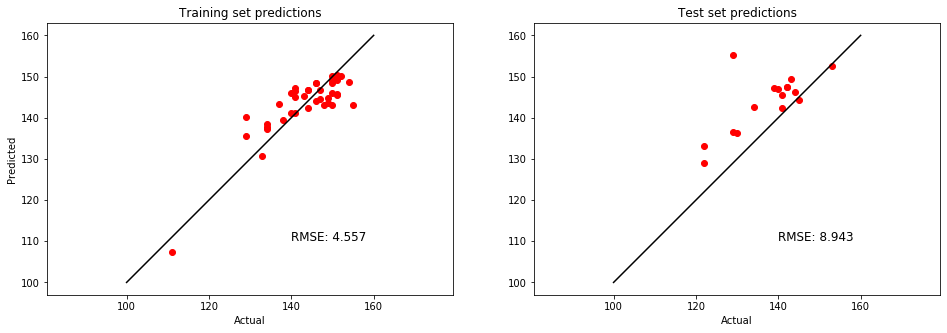

In [71]:
X_clean = np.concatenate([X[0:3,:], X[4:,:]], 0)
y_clean = np.concatenate([y[0:3,:], y[4:,:]], 0)

theta_clean = np.linalg.inv(X_clean.T @ X_clean) @ X_clean.T @ y_clean
print(theta_clean)

yhat_clean = X_clean @ theta_clean
yhat2_clean = X2 @ theta_clean

m_clean = X_clean.shape[0]
rmse_clean = np.sqrt((yhat_clean - y_clean).T @ (yhat_clean - y_clean) / m_clean)
rmse2_clean = np.sqrt((yhat2_clean - y2).T @ (yhat2_clean - y2) / m2)

fig, (ax1, ax2) = plt.subplots(1, 2)
miny = 100
maxy = 160

ax1.plot(y_clean, yhat_clean, 'ro')
ax1.plot([miny, maxy],[miny, maxy], 'k-')
ax1.set_xlim([miny, maxy])
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.axis('equal')
ax1.set_title('Training set predictions')
ax1.text(140, 110, 'RMSE: %.3f' % rmse_clean, fontsize=12)

ax2.plot(y2, yhat2_clean, 'ro')
ax2.plot([miny, maxy],[miny, maxy], 'k-')
ax2.set_xlim([miny, maxy])
ax2.set_xlabel('Actual')
ax2.axis('equal')
ax2.set_title('Test set predictions')
ax2.text(140, 110, 'RMSE: %.3f' % rmse2_clean, fontsize=12)


4. **Briefly discuss whether the result based on the "cleaned" dataset is better than the result on the original data set.**

The model based on the cleaned dataset is much better.

The original parameter estimate had a positive value for $\theta_1$, which says that as minutes per kilometer gets bigger (pace is slower), heart rate increases, which is counterintuitive.

The new parameter estimate has a negative value for the variable, as we would expect. The value of -11.9 says that if we speed up by one minute per kilometer, heart rate will increase by 12 beats per minute, which seems reasonable.

The RMSE on the training set decreased substantially, from 7.0 to 4.6. The test set RMSE also improved albeit not as much, from 9.4 to 8.9. We see that on the test set, the predictions seem to be higher than the actual rates.

## Question 3 (20 points)

Actually, the data in Questions 1 and 2 are not quite independent of each other, as they form a sequence. Performance in a sport improves with training over time.

Perhaps we can model the effect of training on performance by adding a new variable to the data set that is the number of days since the training began.

Create a new variable indicating the number of days that have passed since training began. Let's name this variable $x_5$, and let $x_4$ be the "hours of rest since the last run" variable (last column in the $\texttt{X}$ data set). Let $x_5^{(0)} = 0$, and let

$$x_5^{(i)} = \frac{1}{24}\sum_{j=1}^{i-1} x_4^{(i)}.$$ 

You can calculate this more easily using the recurrence

$$x_5^{(i)} = x_5^{(i-1)} + \frac{1}{24}x_4^{(i)}.$$ 

**Do the following:**

1. **Add the new variable $x_5$ to your test and training datasets. Note that the test data are just a continuation of the series from the training data, so $x_5$ for the first entry in the test set should be $x_5$ for the last entry in the training set plus the number of rest hours for the first entry in the test set divided by 24.**

2. **Build a new regression model using the augmented data set, give the optimal parameters $\mathbf{\theta}$ here, and show the scatter plot of predicted versus actual outcomes for the training set and test set.**

[[ 1.95861589e+02]
 [-1.14127854e+01]
 [ 5.67831939e-04]
 [ 3.74071805e-02]
 [ 5.44479593e-02]
 [-4.97604330e-02]]


Text(140, 110, 'RMSE: 7.401')

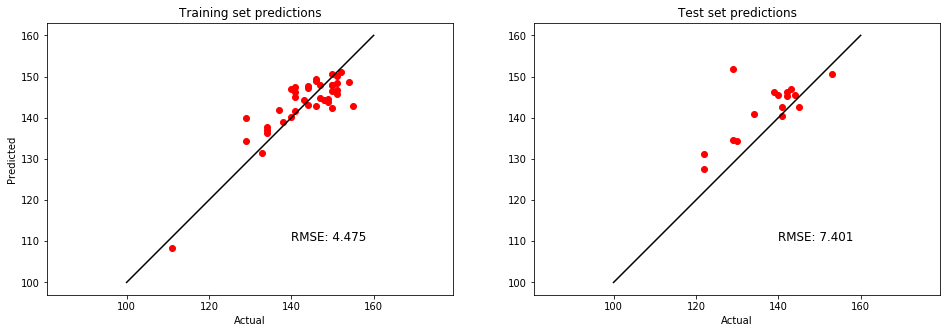

In [75]:

# Add the variable

XX = np.concatenate((X_clean, np.zeros((m_clean, 1))), 1)
for i in range(1,m_clean):
    XX[i,5] = XX[i-1,5] + 1/24 * XX[i,4]

XX2 = np.concatenate((X2, np.zeros((m2, 1))), 1)
XX2[0,5] = XX[m_clean-1,5] + 1/24 * XX2[0,4]
for i in range(1,m2):
    XX2[i,5] = XX2[i-1,5] + 1/24 * XX2[i,4]

# Redo the regression analysis using the new dataset

theta_q3 = np.linalg.inv(XX.T @ XX) @ XX.T @ y_clean
print(theta_q3)

yhat_q3 = XX @ theta_q3
yhat2_q3 = XX2 @ theta_q3

rmse_q3 = np.sqrt((yhat_q3 - y_clean).T @ (yhat_q3 - y_clean) / m_clean)
rmse2_q3 = np.sqrt((yhat2_q3 - y2).T @ (yhat2_q3 - y2) / m2)

fig, (ax1, ax2) = plt.subplots(1, 2)
miny = 100
maxy = 160

ax1.plot(y_clean, yhat_q3, 'ro')
ax1.plot([miny, maxy],[miny, maxy], 'k-')
ax1.set_xlim([miny, maxy])
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.axis('equal')
ax1.set_title('Training set predictions')
ax1.text(140, 110, 'RMSE: %.3f' % rmse_q3, fontsize=12)

ax2.plot(y2, yhat2_q3, 'ro')
ax2.plot([miny, maxy],[miny, maxy], 'k-')
ax2.set_xlim([miny, maxy])
ax2.set_xlabel('Actual')
ax2.axis('equal')
ax2.set_title('Test set predictions')
ax2.text(140, 110, 'RMSE: %.3f' % rmse2_q3, fontsize=12)


The new parameter estimate has a negative load on number of training days, indicating that, as we might expect, when the number of training days increases, the heart rate is decreasing. The value of -0.05 says that every 20 days of training reduces the heart rate by 1 beat per minute. That seems like a small effect, but interestingly, though training RMSE only improves slightly with this variable, from 4.56 to 4.48, test RMSE improves quite a bit, from 8.94 to 7.40. The test set has bigger values for the "days of training" variable, so it has more effect on the test set.

Lastly, we see that the model is still overpredicting heart rate on the test set, indicating that there is still something missing in our predictors. We might consider adding a "volume of training" variable that reflects the amount of training in the past week or so.

## Question 4 (20 points)

Next we consider a classification problem. We know that logistic regression is only capable of modeling linear classification boundaries. In this question, you will synthesize a data set that has a nonlinear classification boundary then show that we can obtain a good logistic regression classifier by transforming the data so that an appropriate classification boundary is linear in the new transformed inputs.

**Do the following:**

1. **Generate 100 data points for class 1 in which $x_1$ is sampled uniformly from the range [-3..3] and $x_2$ is sampled from a Gaussian with mean $x_1^2 + 2$ and standard deviation 1.0.**

2. **Generate 100 data points for class 2 in which $x_1$ is sampled uniformly from the range [-3..3] and $x_2$ is sampled from a Gaussian with mean $x_1^2 + 5$ and standard deviation 1.0.**

Text(0.5, 1.0, 'Classification dataset for question 4')

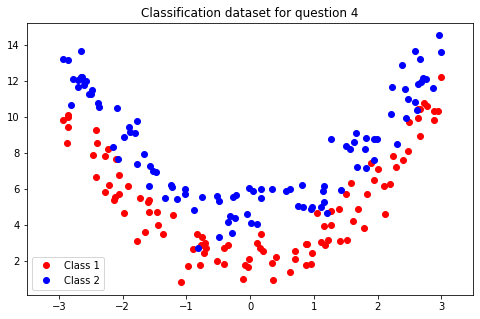

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x11 = np.random.uniform(-3,3,[100,1])
x12 = x11 * x11 + 2 + np.random.normal(0, 1, [100, 1])
X1 = np.concatenate((np.ones((100,1)), x11, x12), 1)

x21 = np.random.uniform(-3,3,[100,1])
x22 = x21 * x21 + 5 + np.random.normal(0, 1, [100, 1])
X2 = np.concatenate((np.ones((100,1)), x21, x22), 1)

plt.figure(figsize=(8, 5))
plt.plot(X1[:,1], X1[:,2], 'ro', label='Class 1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='Class 2')
plt.xlim([-3.5,3.5])
plt.legend()
plt.title('Classification dataset for question 4')



3. **Split the dataset into 80% train and 20% test, estimate a logistic regression model, and report the model's training set accuracy, test set accuracy, and optimal parameters here:**

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Iter 0: parms (-4.000000, 0.000000, 1.0

Iter 113: parms (-3.396028, -0.097008, 0.490853), trn like -96.196819 acc 0.650000 test like -22.038530 acc 0.650000 *
Iter 114: parms (-3.391067, -0.096896, 0.490196), trn like -96.171807 acc 0.650000 test like -22.034321 acc 0.650000 *
Iter 115: parms (-3.386123, -0.096784, 0.489541), trn like -96.146956 acc 0.650000 test like -22.030147 acc 0.650000 *
Iter 116: parms (-3.381194, -0.096673, 0.488888), trn like -96.122265 acc 0.650000 test like -22.026008 acc 0.650000 *
Iter 117: parms (-3.376281, -0.096563, 0.488238), trn like -96.097735 acc 0.650000 test like -22.021904 acc 0.650000 *
Iter 118: parms (-3.371385, -0.096452, 0.487589), trn like -96.073364 acc 0.650000 test like -22.017833 acc 0.650000 *
Iter 119: parms (-3.366504, -0.096342, 0.486943), trn like -96.049151 acc 0.650000 test like -22.013797 acc 0.650000 *
Iter 120: parms (-3.361639, -0.096232, 0.486299), trn like -96.025095 acc 0.650000 test like -22.009794 acc 0.650000 *
Iter 121: parms (-3.356790, -0.096123, 0.485657)

Iter 211: parms (-2.982179, -0.087734, 0.436195), trn like -94.403458 acc 0.656250 test like -21.764479 acc 0.650000 *
Iter 212: parms (-2.978664, -0.087656, 0.435732), trn like -94.390902 acc 0.656250 test like -21.762854 acc 0.650000 *
Iter 213: parms (-2.975161, -0.087579, 0.435271), trn like -94.378441 acc 0.656250 test like -21.761248 acc 0.650000 *
Iter 214: parms (-2.971672, -0.087501, 0.434812), trn like -94.366074 acc 0.656250 test like -21.759659 acc 0.650000 *
Iter 215: parms (-2.968196, -0.087424, 0.434354), trn like -94.353800 acc 0.656250 test like -21.758090 acc 0.650000 *
Iter 216: parms (-2.964734, -0.087348, 0.433898), trn like -94.341620 acc 0.656250 test like -21.756538 acc 0.650000 *
Iter 217: parms (-2.961284, -0.087272, 0.433444), trn like -94.329531 acc 0.656250 test like -21.755004 acc 0.650000 *
Iter 218: parms (-2.957848, -0.087196, 0.432992), trn like -94.317535 acc 0.656250 test like -21.753488 acc 0.650000 *
Iter 219: parms (-2.954424, -0.087120, 0.432541)

Iter 359: parms (-2.588351, -0.079126, 0.384494), trn like -93.306910 acc 0.662500 test like -21.663724 acc 0.650000 *
Iter 360: parms (-2.586433, -0.079085, 0.384243), trn like -93.303175 acc 0.656250 test like -21.663653 acc 0.650000 *
Iter 361: parms (-2.584523, -0.079044, 0.383993), trn like -93.299472 acc 0.656250 test like -21.663588 acc 0.650000 *
Iter 362: parms (-2.582622, -0.079003, 0.383744), trn like -93.295801 acc 0.656250 test like -21.663527 acc 0.650000 *
Iter 363: parms (-2.580729, -0.078962, 0.383496), trn like -93.292162 acc 0.656250 test like -21.663470 acc 0.650000 *
Iter 364: parms (-2.578844, -0.078921, 0.383250), trn like -93.288555 acc 0.656250 test like -21.663418 acc 0.650000 *
Iter 365: parms (-2.576967, -0.078881, 0.383004), trn like -93.284979 acc 0.656250 test like -21.663370 acc 0.650000 *
Iter 366: parms (-2.575099, -0.078840, 0.382760), trn like -93.281435 acc 0.656250 test like -21.663326 acc 0.650000 *
Iter 367: parms (-2.573238, -0.078800, 0.382516)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


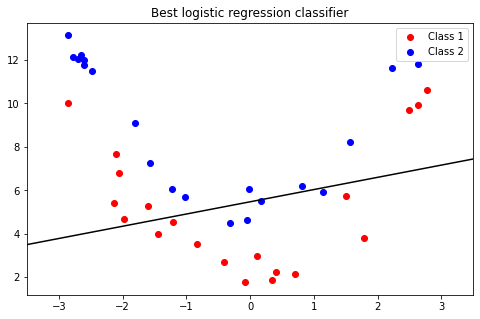

In [7]:
X1_train = X1[0:80,:]
X1_test = X1[80:,:]
X2_train = X2[0:80,:]
X2_test = X2[80:,:]

X_train = np.concatenate((X1_train, X2_train), 0)
y_train = np.concatenate((np.zeros((80,1)), np.ones((80,1))), 0)
print(y_train)
X_test = np.concatenate((X1_test, X2_test), 0)
y_test = np.concatenate((np.zeros((20,1)), np.ones((20,1))), 0)

def predict(X, theta):
    return 1 / (1 + np.exp(- X @ theta))

def loglike(y, ypred):
    return sum(y * np.log(ypred) + (1-y) * np.log(1-ypred))[0]

def accuracy(y, ypred):
    return sum((ypred >= 0.5) == (y == 1)) / y.size
    
test_idx_0 = (y_test==0).reshape(X_test.shape[0])
test_idx_1 = (y_test==1).reshape(X_test.shape[0])

theta = np.array([[-4,0,1]]).T
theta_best = theta
loglike_test_best = 0
alpha = 0.001
for i in range(0,400):
    ypred_train = predict(X_train, theta)
    loglike_train = loglike(y_train, ypred_train)
    acc_train = accuracy(y_train, ypred_train)
    ypred_test = predict(X_test, theta)
    loglike_test = loglike(y_test, ypred_test)
    acc_test = accuracy(y_test, ypred_test)
    sbest = ''
    if i == 0 or loglike_test > loglike_test_best:
        loglike_test_best = loglike_test
        theta_best = theta
        sbest = '*'
    print('Iter %d: parms (%f, %f, %f), trn like %f acc %f test like %f acc %f %s' %
          (i, theta[0], theta[1], theta[2], loglike_train, acc_train, loglike_test, acc_test, sbest))
    dtheta = X_train.T @ (y_train - ypred_train)
    theta = theta + alpha * dtheta

def plot_line(plot_handle, theta):
    X11 = -3.5
    X12 = (- theta[0] - theta[1] * X11) / theta[2]
    X21 = 3.5
    X22 = (- theta[0] - theta[1] * X21) / theta[2]
    plot_handle.plot([X11, X21], [X21, X22], 'k-')

plt.figure(figsize=(8, 5))
plt.plot(X_test[test_idx_0, 1], X_test[test_idx_0, 2], 'ro', label='Class 1')
plt.plot(X_test[test_idx_1, 1], X_test[test_idx_1, 2], 'bo', label='Class 2')
plot_line(plt, theta_best)
plt.xlim([-3.5,3.5])
plt.legend()
plt.title('Best logistic regression classifier')

print('Best parameters: (%f, %f, %f)' % (theta_best[0], theta_best[1], theta_best[2]))


4. **Transform the data to contain five input variables: $x_1$, $x_2$, $x_1^2$, $x_2^2$, and $x_1x_2$. Build a new logistic regression model, report its training and test set accuracy, and optimal parameters here:**

In [223]:
def augment(X):
    m = X.shape[0]
    return np.concatenate(
        (X,
         (X[:,1] * X[:,1]).reshape(m,1),
         (X[:,2] * X[:,2]).reshape(m,1),
         (X[:,1] * X[:,2]).reshape(m,1)), 1)


XX_train = augment(X_train)
XX_test = augment(X_test)

theta = np.array([[-4,0,1,0,0,0]]).T
theta_best = theta
loglike_test_best = 0
alpha = 0.00001
for i in range(0,100000):
    ypred_train = predict(XX_train, theta)
    loglike_train = loglike(y_train, ypred_train)
    acc_train = accuracy(y_train, ypred_train)
    ypred_test = predict(XX_test, theta)
    loglike_test = loglike(y_test, ypred_test)
    acc_test = accuracy(y_test, ypred_test)
    sbest = ''
    if i == 0 or loglike_test > loglike_test_best:
        loglike_test_best = loglike_test
        theta_best = theta
        sbest = '*'
    if i % 10000 == 0:
        print('Iter %d: parms (%f, %f, %f, %f, %f, %f), trn like %f acc %f test like %f acc %f %s' %
              (i, theta[0], theta[1], theta[2], theta[3], theta[4], theta[5], loglike_train, acc_train, loglike_test, acc_test, sbest))
    dtheta = XX_train.T @ (y_train - ypred_train)
    theta = theta + alpha * dtheta

Iter 0: parms (-4.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000), trn like -130.170310 acc 0.750000 test like -42.430907 acc 0.675000 *
Iter 10000: parms (-4.164229, 0.101575, 0.932157, -1.785552, 0.074421, -0.044874), trn like -26.664782 acc 0.968750 test like -9.163064 acc 0.900000 *
Iter 20000: parms (-4.306685, 0.187622, 0.904487, -2.254252, 0.110598, -0.062191), trn like -24.084404 acc 0.956250 test like -8.544017 acc 0.925000 *
Iter 30000: parms (-4.434338, 0.262386, 0.891342, -2.529830, 0.132437, -0.075813), trn like -23.086221 acc 0.962500 test like -8.344345 acc 0.925000 *
Iter 40000: parms (-4.551194, 0.329730, 0.887766, -2.720948, 0.147476, -0.087313), trn like -22.532088 acc 0.956250 test like -8.256371 acc 0.925000 *
Iter 50000: parms (-4.659898, 0.391268, 0.890327, -2.864033, 0.158499, -0.097319), trn like -22.167765 acc 0.956250 test like -8.212927 acc 0.925000 *
Iter 60000: parms (-4.762136, 0.447899, 0.897033, -2.976018, 0.166868, -0.106173), trn like -21.90

Best parameters: (-4.988274, 0.567531, 0.923699, -3.167168, 0.180213, -0.123963)


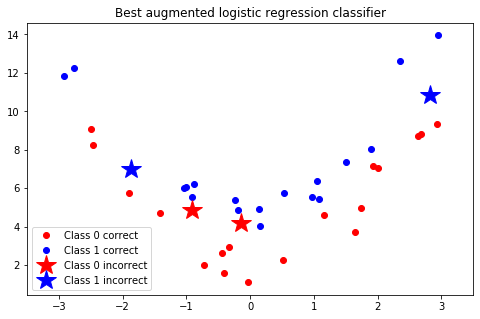

In [224]:

plt.figure(figsize=(8, 5))
y_pred_best = predict(XX_test, theta_best)
idx_correct = (y_pred_best < 0.5) == (y_test == 0)
idx_correct_0 = ((y_test == 0) & idx_correct).reshape(40)
idx_correct_1 = ((y_test == 1) & idx_correct).reshape(40)
idx_incorrect_0 = ((y_test == 0) & ~idx_correct).reshape(40)
idx_incorrect_1 = ((y_test == 1) & ~idx_correct).reshape(40)

plt.plot(X_test[idx_correct_0, 1], X_test[idx_correct_0, 2], 'ro', label='Class 0 correct')
plt.plot(X_test[idx_correct_1, 1], X_test[idx_correct_1, 2], 'bo', label='Class 1 correct')
plt.plot(X_test[idx_incorrect_0, 1], X_test[idx_incorrect_0, 2], 'r*', label='Class 0 incorrect', ms=20)
plt.plot(X_test[idx_incorrect_1, 1], X_test[idx_incorrect_1, 2], 'b*', label='Class 1 incorrect', ms=20)
plt.xlim([-3.5,3.5])
plt.legend()
plt.title('Best augmented logistic regression classifier')

print('Best parameters: (%f, %f, %f, %f, %f, %f)' % (theta_best[0], theta_best[1], theta_best[2], theta_best[3], theta_best[4], theta_best[5]))

## Question 5 (20 points)

Suppose you were interested in predicting the number of traffic fatalities that occur at a given traffic intersection based on various factors that might indicate the level of danger at that intersection: number of lanes, speed limit, types and number of businesses close to the intersection, curvature of the roads leading to the intersection, number of people that live in the surrounding area, and so on.

Imagine that you obtain monthly fatality counts for 500 intersections in Bangkok and also obtain the necessary input data on the characteristics of the intersections then start to model.

The standard linear regression model would consider the outcome (the number of traffic fatalities per month) as a Gaussian random variable with a mean of $\mathbf{\theta}^T\mathbf{x}$. But that might not be the best approach for this problem.

For example, you might consider the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).

**Do the following.**

1. **Read briefly about the Poisson distribution and explain here why it would be a better model of the outcome (number of traffic fatalities per month at a particular intersection) than a Gaussian.**

2. **Noting that the Poisson distribution is a member of the exponential family, explain in general how you could use the GLM approach to come up with a model that predicts the fatality rate to be a Poisson random variable with mean** $\lambda = \exp(\mathbf{\theta}^T\textbf{x})$. **(Note that the exponential here is just to convert the linear combination of inputs, which could be positive or negative, to a strictly positive value.)**

Note that for part 2, *you do not need to derive any equations*! Just explain what steps you would take to obtain a good machine learning algorithm for this problem.



**Solution:**

1. A Gaussian random variable has a range of $-\infty$ to $\infty$, with nonzero probability for every value in that range. Clearly, the probability of observing a negative number of fatalities at an intersection is zero. The Gaussian would have to be modified somehow (truncation?) to accurately model the observation. The truncated Gaussian probably wouldn't be a member of the exponential family any more.

   A Poisson random variable, on the other hand, models exactly what we want, i.e., a distribution over the number $k$ of events occurring in a given range of time. It is only valid for integer values of $k \ge 0$. 

2. We would first model the Poisson as a member of the exponential family, with parameter $\lambda$, the expected number of fatalities per month at a given intersection. This will allow us to write down the log likelihood function, take the gradient of the log likelihood with respect to $\mathbf{\theta}$, and thereby arrive at an estimation algorithm for $\mathbf{\theta}$. Once we have the estimation algorithm, given a dataset, we guess an initial value for $\mathbf{\theta}$ and use gradient ascent to find the maximum.